## Первичный анализ данных

Барышев Михаил ИУ10-56, Вариант - 5, База данных - http://archive.ics.uci.edu/dataset/158/poker+hand

### Цель работы

изучение программных средств для организации рабочего места специалиста по машинному обучению и анализу данных.

### Задачи 

 - получение программного доступа к данным, содержащимся в источниках различного типа;
 - выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
 - исследование простых методов визуализации данных;
 - изучение основных библиотек Python для работы с данными.

### Продолжительность и сроки сдачи

Продолжительность работы: - 4 часа.

Мягкий дедлайн (5 баллов): 10.10.2023

Жесткий дедлайн (2.5 баллов): 24.10.2023

### Теоретические сведения

Каждая запись представляет собой пример раздачи, состоящей из пяти игральных карт, взятых из стандартной колоды из 52. Каждая карта описывается с использованием двух атрибутов (масти и ранга), в общей сложности 10 прогнозирующих атрибутов. Существует один атрибут класса, который описывает "покерную комбинацию". 

База данных, используемая в моей работе состоит из 11 столбцов, в которой S - масть карты, C - ранг карты, CLASS - комбинация

1) S1 "Suit of card #1"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

2) C1 "Rank of card #1"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

3) S2 "Suit of card #2"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

4) C2 "Rank of card #2"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

5) S3 "Suit of card #3"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

6) C3 "Rank of card #3"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

7) S4 "Suit of card #4"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

8) C4 "Rank of card #4"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

9) S5 "Suit of card #5"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

10) C5 "Rank of card 5"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

11) CLASS "Poker Hand"
    Ordinal (0-9)

    0: Nothing in hand; not a recognized poker hand 
    1: One pair; one pair of equal ranks within five cards
    2: Two pairs; two pairs of equal ranks within five cards
    3: Three of a kind; three equal ranks within five cards
    4: Straight; five cards, sequentially ranked with no gaps
    5: Flush; five cards with the same suit
    6: Full house; pair + different rank three of a kind
    7: Four of a kind; four equal ranks within five cards
    8: Straight flush; straight + flush
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

На основе предоставленного набора данных, который касается покерных рук, можно построить различные модели для решения разнообразных задач в области машинного обучения. Например:

### Предсказание ранга карты (номера) на основе масти:
 - Признаки:
    Suit of card (масть карты 1-5): Категориальный (номинальный).
 - Целевая переменная:
    Rank of card (ранг карты 1-5): Порядковый (1-13, представляющий Ace, 2-10, Jack, Queen, King).
 - Модель:
    Модель регрессии, например, линейная регрессия или деревья решений.
### Определение типа масти на основе ранга карты:
 - Признаки:
    Rank of card (ранг карты 1-5): Порядковый (1-13, представляющий Ace, 2-10, Jack, Queen, King).
 - Целевая переменная:
    Suit of card (масть карты 1-5): Категориальный (номинальный).
 - Модель:
    Модель классификации, например, деревья решений, метод ближайших соседей.
### Другие покерные анализы и предсказания:
 - Возможны другие задачи, такие как предсказание вероятности выигрыша для определенной комбинации карт, анализ шансов на улучшение руки в течение раздачи и т. д.

In [29]:
import numpy as np
data_path = "./poker-hand-testing.data"

In [32]:
data1 = np.genfromtxt(data_path, delimiter=",", dtype=None)
print('Shape of the dataset:', data1.shape)
print('Dataset type:', type(data1))
print('A single row of the dataset is type of:', type(data1[0]))
print('Types of elements:', type(data1[0][1]), type(data1[0][10]))
print('Dataset:')
print(data1)

Shape of the dataset: (1000000, 11)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.ndarray'>
Types of elements: <class 'numpy.int32'> <class 'numpy.int32'>
Dataset:
[[ 1  1  1 ...  1 12  0]
 [ 3 12  3 ...  2  5  1]
 [ 1  9  4 ...  3  9  1]
 ...
 [ 1 11  4 ...  2  7  1]
 [ 3 11  1 ...  2  8  1]
 [ 2  5  2 ...  3  3  2]]


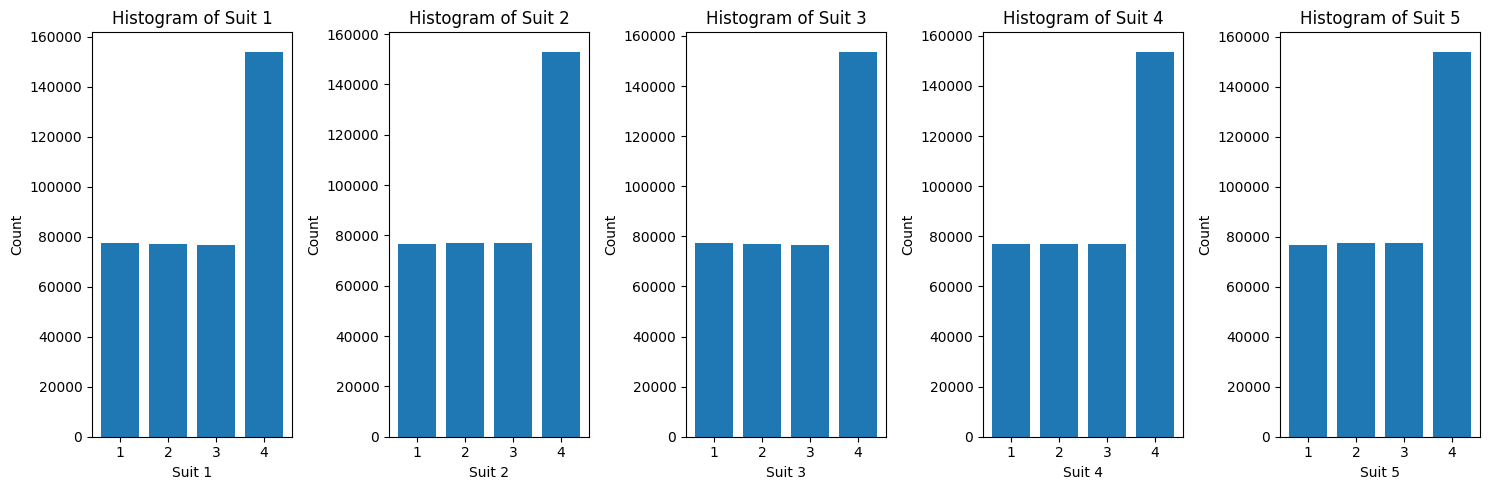

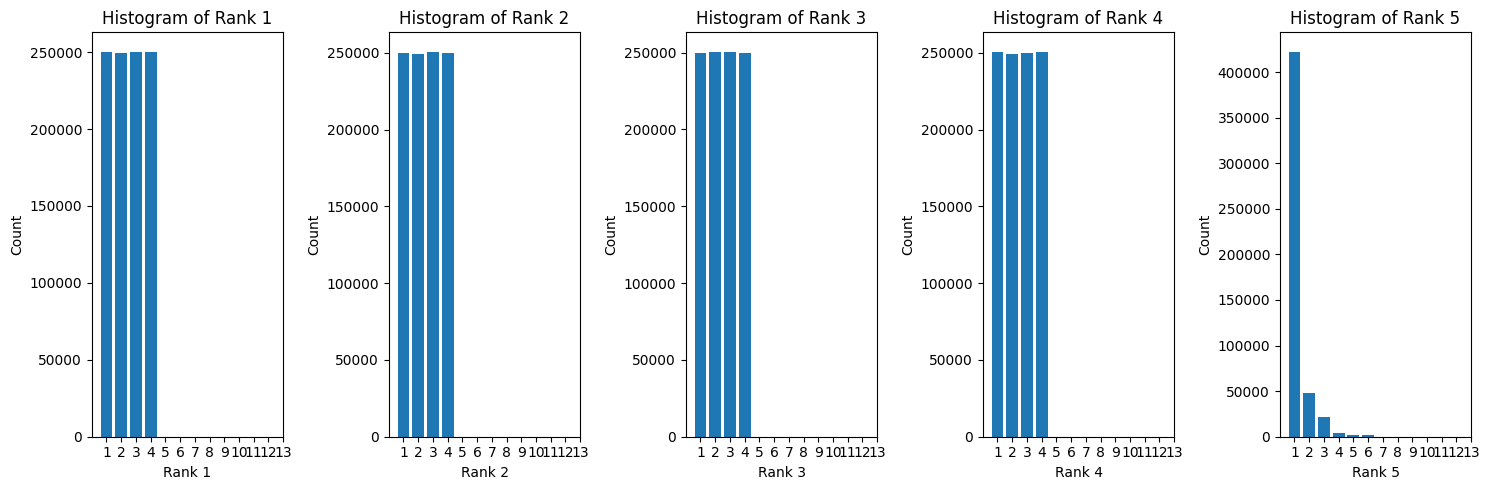

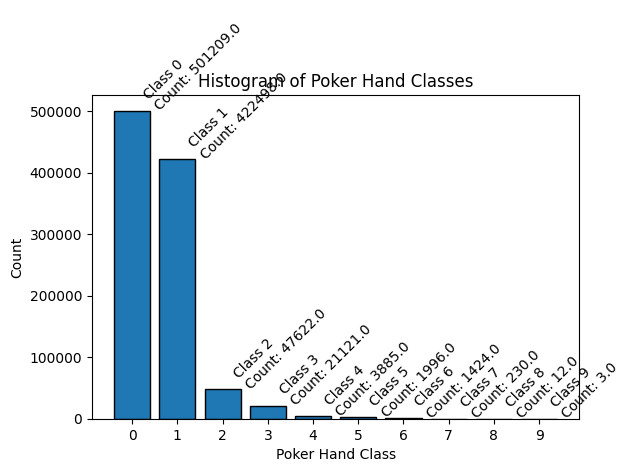

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Загружаем базу
data = pd.read_csv('./poker-hand-testing.data', header=None)

# Распределяем столбцы ждя S и C
suits_columns = [1, 3, 5, 7, 9]
ranks_columns = [2, 4, 6, 8, 10]

# Извлекаем данные для S и C
suits_data = data.iloc[:, suits_columns]
ranks_data = data.iloc[:, ranks_columns]

# Определяем столбец для класса комбинаций
poker_classes = data.iloc[:, 10]

# Строим графики для мастей карт
plt.figure(figsize=(15, 5))

for i, suit_col in enumerate(suits_columns):
    plt.subplot(1, 5, i+1)
    plt.hist(suits_data.iloc[:, i], bins=range(1, 6), align='left', rwidth=0.8)
    plt.xlabel(f'Suit {i+1}')
    plt.ylabel('Count')
    plt.xticks(range(1, 5))  # по условию масти 1-4
    plt.title(f'Histogram of Suit {i+1}')

plt.tight_layout()

# Строим графики для рангов
plt.figure(figsize=(15, 5))

for i, rank_col in enumerate(ranks_columns):
    plt.subplot(1, 5, i+1)
    plt.hist(ranks_data.iloc[:, i], bins=range(1, 14), align='left', rwidth=0.8)
    plt.xlabel(f'Rank {i+1}')
    plt.ylabel('Count')
    plt.xticks(range(1, 14))  # по условию 1-13
    plt.title(f'Histogram of Rank {i+1}')

plt.tight_layout()

# Строим график для классов комбинаций
plt.figure()
hist, bins, _ = plt.hist(poker_classes, bins=range(11), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Poker Hand Class')
plt.ylabel('Count')
plt.xticks(range(10))  # по условию 0-9
plt.title('Histogram of Poker Hand Classes')

# Подписываем название класса и количество результатов
for i in range(10):
    plt.annotate(f'Class {i}\nCount: {hist[i]}', xy=(i, 0), xytext=(i + 0.2, hist[i] + 500), rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

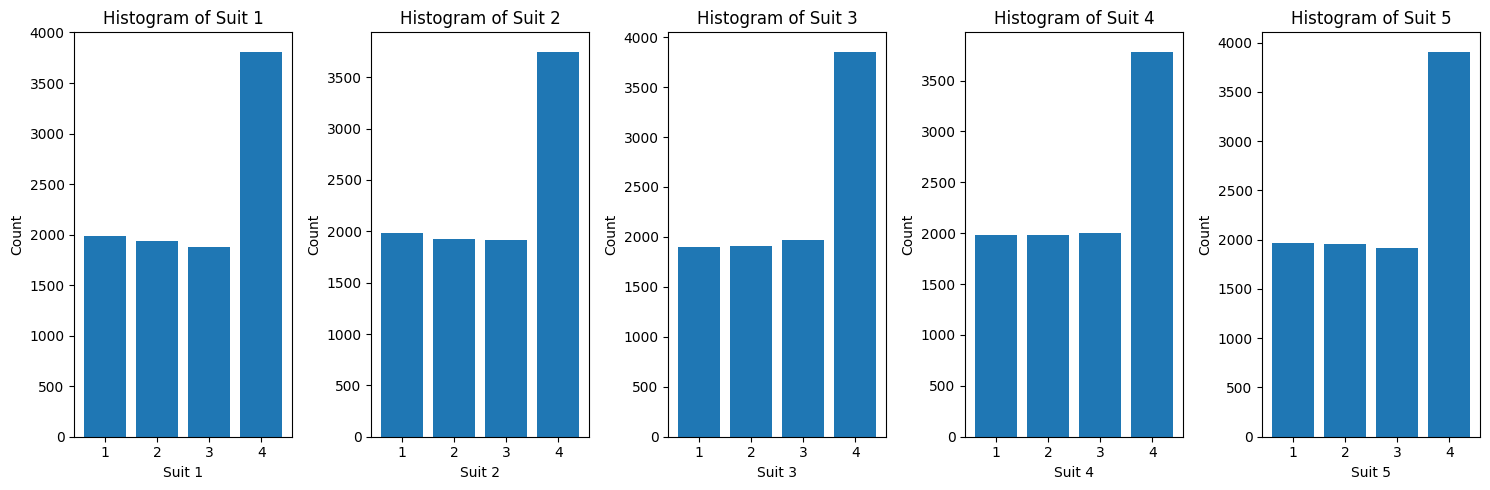

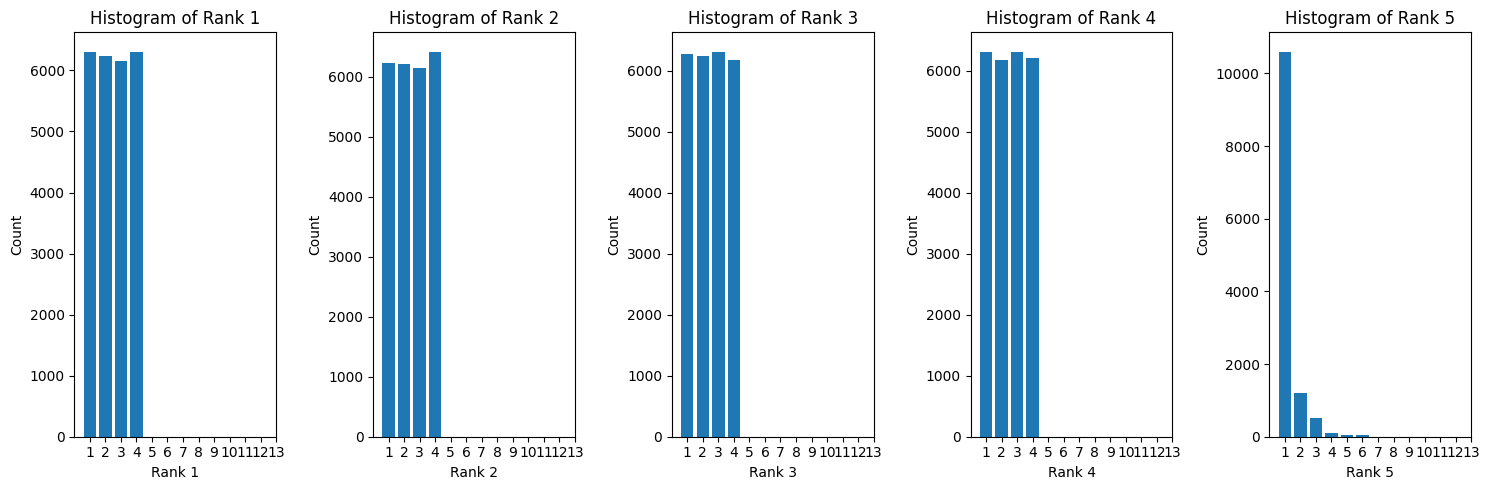

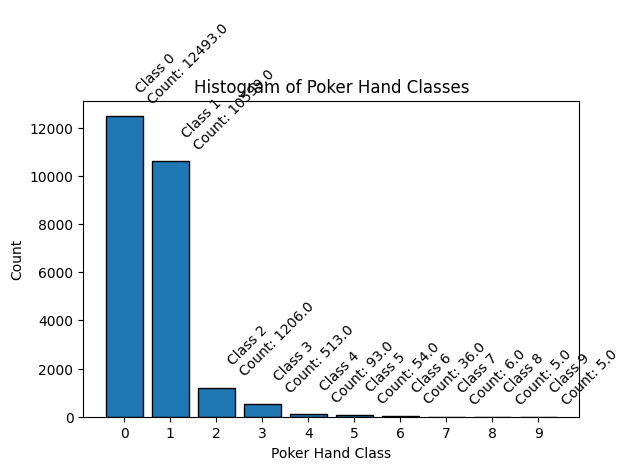

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Загружаем базу
data = pd.read_csv('./poker-hand-training-true.data', header=None)

# Распределяем столбцы ждя S и C
suits_columns = [1, 3, 5, 7, 9]
ranks_columns = [2, 4, 6, 8, 10]

# Извлекаем данные для S и C
suits_data = data.iloc[:, suits_columns]
ranks_data = data.iloc[:, ranks_columns]

# Определяем столбец для класса комбинаций
poker_classes = data.iloc[:, 10]

# Строим графики для мастей карт
plt.figure(figsize=(15, 5))

for i, suit_col in enumerate(suits_columns):
    plt.subplot(1, 5, i+1)
    plt.hist(suits_data.iloc[:, i], bins=range(1, 6), align='left', rwidth=0.8)
    plt.xlabel(f'Suit {i+1}')
    plt.ylabel('Count')
    plt.xticks(range(1, 5))  # по условию масти 1-4
    plt.title(f'Histogram of Suit {i+1}')

plt.tight_layout()

# Строим графики для рангов
plt.figure(figsize=(15, 5))

for i, rank_col in enumerate(ranks_columns):
    plt.subplot(1, 5, i+1)
    plt.hist(ranks_data.iloc[:, i], bins=range(1, 14), align='left', rwidth=0.8)
    plt.xlabel(f'Rank {i+1}')
    plt.ylabel('Count')
    plt.xticks(range(1, 14))  # по условию 1-13
    plt.title(f'Histogram of Rank {i+1}')

plt.tight_layout()

# Строим график для классов комбинаций
plt.figure()
hist, bins, _ = plt.hist(poker_classes, bins=range(11), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Poker Hand Class')
plt.ylabel('Count')
plt.xticks(range(10))  # по условию 0-9
plt.title('Histogram of Poker Hand Classes')

# Подписываем название класса и количество результатов
for i in range(10):
    plt.annotate(f'Class {i}\nCount: {hist[i]}', xy=(i, 0), xytext=(i + 0.2, hist[i] + 500), rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

# Контрольные вопросы

### Инструментальные средства для организации рабочего места специалиста Data Science:

 - Python: Основной язык программирования в области Data Science. Имеет богатый выбор библиотек для анализа данных, машинного обучения и визуализации.

 - Jupyter Notebook/JupyterLab: Интерактивная среда для создания и обмена документами, в которых можно выполнять код, делать заметки и визуализации.

 - IDE (Integrated Development Environment): Различные IDE, такие как PyCharm, Visual Studio Code, Spyder, предоставляют удобную среду для написания, тестирования и отладки кода.

 - Библиотеки анализа данных: Pandas, NumPy - для работы с данными и выполнения операций линейной алгебры.

 - Библиотеки визуализации данных: Matplotlib, Seaborn, Plotly - для создания информативных визуализаций.

 - Системы управления версиями: Git, GitHub - для контроля версий и совместной работы над проектами.

### Библиотеки Python для машинного обучения:

 - Scikit-Learn:
    Библиотека, предназначенная для обучения моделей машинного обучения. Включает в себя алгоритмы классификации, регрессии, кластеризации, а также инструменты для предобработки данных и оценки моделей.

 - TensorFlow:
    Фреймворк для глубокого обучения, разработанный Google. Позволяет строить и обучать нейронные сети, включая сверточные и рекуррентные.

 - Keras:
    Высокоуровневый API для работы с нейронными сетями, построенный поверх фреймворков, таких как TensorFlow и Theano. Облегчает создание и обучение моделей.

 - PyTorch:
    Фреймворк для глубокого обучения с открытым исходным кодом, разработанный Facebook. Имеет динамический вычислительный граф, что упрощает процесс экспериментирования и отладки моделей.

 - XGBoost:
    Реализация алгоритма градиентного бустинга. Используется для задач классификации, регрессии и ранжирования. Обеспечивает высокую производительность и эффективность.

 - NLTK (Natural Language Toolkit):
    Библиотека для обработки естественного языка, предназначенная для анализа текста и создания моделей обработки языка.

### Почему Python и его библиотеки широко распространены в машинном обучении:

 - Простота и читаемость кода: Python имеет простой и интуитивно понятный синтаксис, что упрощает разработку и поддержку кода.

 - Богатые библиотеки: Python имеет множество библиотек для анализа данных, машинного обучения, визуализации и других задач, что делает его мощным инструментом для специалистов Data Science.

 - Активное сообщество: Сообщество разработчиков Python активно работает над улучшением языка и его библиотек, предоставляя обновления, дополнения и поддержку.

 - Поддержка крупных организаций: Большие компании, такие как Google, Facebook, Microsoft, активно используют Python для разработки и исследований, поддерживая его развитие и распространение.